<a href="https://colab.research.google.com/github/SMKIDRaadet/SMKID_Analysis/blob/main/SMKID_Deltagere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Denne notebook er lavet for at undersøge de tilmeldingsark der ligger på Google Drive. Listerne er fra d. 15. november 2016 op til nu. 

#Opsætning

In [695]:
#Import dependencies
import pandas as pd
import numpy as np
import os
from google.colab import drive, auth
import gspread
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import datetime

For at kunne indlæse deltagerlisterne skal Google Drive lige mountes. 

In [696]:
drive.mount('/content/drive')
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())
if 'S M-KID Rådet' not in os.listdir('/content/drive/My Drive/'):
  raise ValueError('S/M-KID Rådets folder not in your Google Drive.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


URLs til deltagerlisterne for rådsmøderne:

In [697]:
#URLS
deltagerlister = {'15/11/2016' : 'https://docs.google.com/spreadsheets/d/1-22xUBkwsz0bXFU1oqD3XV6aesFWgDgIJ6QC-POBd2c',
                  '10/01/2017' : 'https://docs.google.com/spreadsheets/d/1nnlcnO9OGNH4ZPFTaVR9zwH6cFF2XplwCtIP8aCCDkU',
                  '01/02/2017' : 'https://docs.google.com/spreadsheets/d/1moKB5i4gq0cnGC2Pw7ctXrAZrGcWwi5X6d-ASvcFMXU',
                  '01/03/2017' : 'https://docs.google.com/spreadsheets/d/1U_Rx2N0zp8ZLFT5YCFxhUMFcl8PR7IICnN9rEQ8332E',
                  '28/03/2017' : 'https://docs.google.com/spreadsheets/d/1f8-TghVbmSi28kTcNO2B5rfeV3uqwAYh1N5R0RGiDfg',
                  '03/05/2017' : 'https://docs.google.com/spreadsheets/d/1ojQhJhSD9W_pqHRPvXY0rbh-F0AdWPe_qCxeCJt4s84',
                  '13/08/2017' : 'https://docs.google.com/spreadsheets/d/1JNo2EpdA8U2lsg7WsRDliKhjYJqDXdLSBlm9-BP2Ry4',
                  '02/10/2017' : 'https://docs.google.com/spreadsheets/d/1soWe_ZWOQE8pEX4x5rB72M1b318AjrdR0XLdUQxzBK8',
                  '25/11/2017' : 'https://docs.google.com/spreadsheets/d/1TFQcwDc2BU43QggLlDDFBL_mG7CMlhJJF2iH3xtPDQI',
                  '10/01/2017' : 'https://docs.google.com/spreadsheets/d/14jzbJ_30ViXe_okBAbtw2OsSKyurqpm-vMTFkOLLI2Y',
                  '30/01/2018' : 'https://docs.google.com/spreadsheets/d/12b-uEMi39n1Xl5dqbbu-TbuhqeNzzrLi7M5e3Gi134U',
                  '13/03/2018' : 'https://docs.google.com/spreadsheets/d/1uxnsjQIEwkwP83xuhFs8G7Mvfy5FrssrN5zmtOfds0g',
                  '24/04/2018' : 'https://docs.google.com/spreadsheets/d/1x5jq9OI7qMCa8rtn-Oc_x7YE-EgfQcNsAjILG6oFzNE',
                  '12/06/2018' : 'https://docs.google.com/spreadsheets/d/132TkeTs-rtp-yigA8xPI2FZZDU04z5zegBy8ffnpo6E',
                  '11/09/2018' : 'https://docs.google.com/spreadsheets/d/1-0En5Ag3hZH5Otv4HoK_xd_mEPPH9Yjn0Hm70z_ATLI',
                  '03/10/2018' : 'https://docs.google.com/spreadsheets/d/1mU3wThLNmWCmB2Gpcdvgjw9JEP6wngJjs-1F4DAiVyA',
                  '23/10/2018' : 'https://docs.google.com/spreadsheets/d/151o4cOU2gInzwPx1_U8Cp-a6JjAhhThdftU5tsY0rTU',
                  '20/11/2018' : 'https://docs.google.com/spreadsheets/d/1IiNhi9rzJFeuGnBF8qgAeSW8-3yLgujQoBx9Nnz_ZaA',
                  '08/01/2019' : 'https://docs.google.com/spreadsheets/d/1gaZYR1ubOFD_5bKbYWik1fNmXYP0rXbu6R2veG6DmXM',
                  '06/02/2019' : 'https://docs.google.com/spreadsheets/d/1WsGAAFXT5Zwk4EJPE7gUwkXeJHR9xFRJ7wfP1OkL4IA',
                  '02/04/2019' : 'https://docs.google.com/spreadsheets/d/1roxMso6DTVCbgUo14UjlZ4YiQn1QawmD0nrpfNwBDhs',
                  '18/06/2019' : 'https://docs.google.com/spreadsheets/d/171fm1yCk-CkSecTrVtUkf4Lcc__4n-wYX8pl6CEsF_Q',
                  '09/09/2019' : 'https://docs.google.com/spreadsheets/d/1Bm_ZggnSolX9U26VDGyzZkbCutkSQ73FAxBUlGnDfnU',
                  '09/10/2019' : 'https://docs.google.com/spreadsheets/d/1V1IHljGNk630_QKLr1UpAJLvIV_WkDLnx7kK7xnGsLk',
                  '28/10/2019' : 'https://docs.google.com/spreadsheets/d/17kvV8Czjk9fPXsf6LW_BDMf1YHW41exJpAsSwuDejCc',
                  '25/11/2019' : 'https://docs.google.com/spreadsheets/d/1yaA-1FYlCIQDpaT0Ku2Y9srujduznwtJWxBJ-7K1kms',
                  '14/01/2020' : 'https://docs.google.com/spreadsheets/d/1lMi8MbW7SJqehiROaySjE7V6eUc-ScTKnaM1dBoLN70',
                  '03/02/2020' : 'https://docs.google.com/spreadsheets/d/1pUF7H2KYX_k7lBgNGRzW4pnFXHC8gH4cgyCoOyV6fdA',
                  '02/03/2020' : 'https://docs.google.com/spreadsheets/d/1fijTWsC4CdnTgwMt21HakZxSdcTzqWqqO2-_w-E_aQ0',
                  '23/03/2020' : 'https://docs.google.com/spreadsheets/d/1sHOTfAu4px05cS1GlxuDMT5KrCCMRPhhYSvAq0hsx6c',
                  '28/04/2020' : 'https://docs.google.com/spreadsheets/d/1Rm8KYKMs8sDlkkMpIkrdb5TqS8-VQsHoh9bl-DHlKzA',
                  '07/06/2020' : 'https://docs.google.com/spreadsheets/d/1X0oTxWk3cBUHfEYXOLSzoObD9xIUTSLmgCxa-ty7J84',
                  '14/09/2020' : 'https://docs.google.com/spreadsheets/d/16PDwASOuUfmcC4sFNirVQSvVtK3tII8crOSLvxCY0Lo',
                  '28/09/2020' : 'https://docs.google.com/spreadsheets/d/1kq55taNGA8W2JU_Qbnjn0NVrwSR3yORsXvp9-8qFfR4'}

# Funktioner

In [703]:
def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

def load_deltagerliste(url, date):
  #Loads a single deltagerliste.
  global gc

  sh = gc.open_by_url(url)
  df = pd.DataFrame(sh.get_worksheet(0).get_all_values())

  #Remove the column-row
  df = df[1:]

  #Grab the first 5 columns
  df = df.iloc[:,:5]

  df.columns = ['Tidsstempel', 'Fulde navn', 'Studienummer', 'Studieretning', 'Konstitueret']
  
  df['Dato'] = date

  #Set invalid studynumbers to nan.
  import re
  r = re.compile(r's\d{6}')
  df['Studienummer'] = df['Studienummer'].str.lower()
  df['Studienummer'] = df['Studienummer'].str.strip()
  
  df['Studienummer'].loc[df['Studienummer'].apply(lambda x : not bool(r.match(x)))] = np.nan

  df = df.drop_duplicates(subset=['Studienummer'])

  return df

def load_data(x):
  #x is a dictionary containing url and dates of the meetings.
  urls  = list(x.values())
  dates = list(x.keys())

  df = pd.DataFrame(columns = ['Tidsstempel', 'Fulde navn', 'Studienummer', 'Studieretning', 'Konstitueret', 'Dato'])

  n = len(urls)

  out = display(progress(0, n-1), display_id=True)

  for i in range(n):
    url  = urls[i]
    date = dates[i]

    out.update(progress(i, n-1))
    
    df = df.append(load_deltagerliste(url, date))

  return df

def meeting_attendance(df):
  #Calculate meeting attendance for each meeting.
  df_out = df.groupby('Dato',as_index=False).count()
  df_out = df_out.iloc[:,:2]
  df_out.columns = ['Dato','Participants']
  df_out['Dato'] = pd.to_datetime(df_out['Dato'])
  df_out = df_out.sort_values('Dato')
  df_out.columns = ['Date', 'Participants']
  df_out.reset_index(drop=True, inplace=True)
  return df_out

def round_down(num, divisor):
  return num - (num%divisor)

def round_up(x):
    import math
    return int(math.ceil(x / 10.0)) * 10


#Add vertical lines at the first day in september.
def plot_september(yr, min_y, max_y):
  plt.vlines(datetime.date(yr, 9, 1), min_y, max_y, linestyle='--')


def plot_attendance(df):
  fig = plt.figure(figsize=(12,8), dpi= 100)
  plt.plot('Date','Participants', '.', data=df)

  ax = plt.gca()
 
  min_y = round_down(min(df['Participants']),10)
  max_y = round_up(max(df['Participants']))

  # Major ticks every 20, minor ticks every 5
  major_ticks = np.arange(min_y, max_y, 5)

  ax.set_yticks(major_ticks)

  years = list(pd.DatetimeIndex(df['Date']).year.unique())
  for year in years:
    plot_september(year,min_y,max_y)
  
  plt.grid()

  return

def meeting_counts(df):
  meetings = df.groupby('Studienummer',as_index=False).count().iloc[:,:2]
  meetings.columns = ['Studienummer', 'Antal møder']

  name_and_studynumber = df[['Fulde navn', 'Studienummer']]
  name_and_studynumber = name_and_studynumber.drop_duplicates(subset='Studienummer')
  name_and_studynumber = name_and_studynumber.dropna()

  df2 = pd.merge(left=name_and_studynumber, right=meetings, on='Studienummer')
  df2 = df2.sort_values('Antal møder',ascending=False)

  v1 = np.asarray(df2['Antal møder'].value_counts())
  v2 = np.sort(df2['Antal møder'].unique())

  v1 = (v1/np.cumsum(v1))*100

  df3 = pd.DataFrame({'Antal møder' : v2, 'Procent' : v1})
  df4 = pd.merge(left=df2, right=df3, on='Antal møder')
  df4['Top'] = df4['Procent'].apply(lambda x : str(round(x,2)) + '%')
  df4 = df4.drop('Procent',axis=1)

  return df4


Find den, der har deltaget til flest møder.

Antallet 

#Data analyse

In [704]:
#Data loades
df = load_data(deltagerlister)

Antallet af deltagere til hvert rådsmøde over tid.

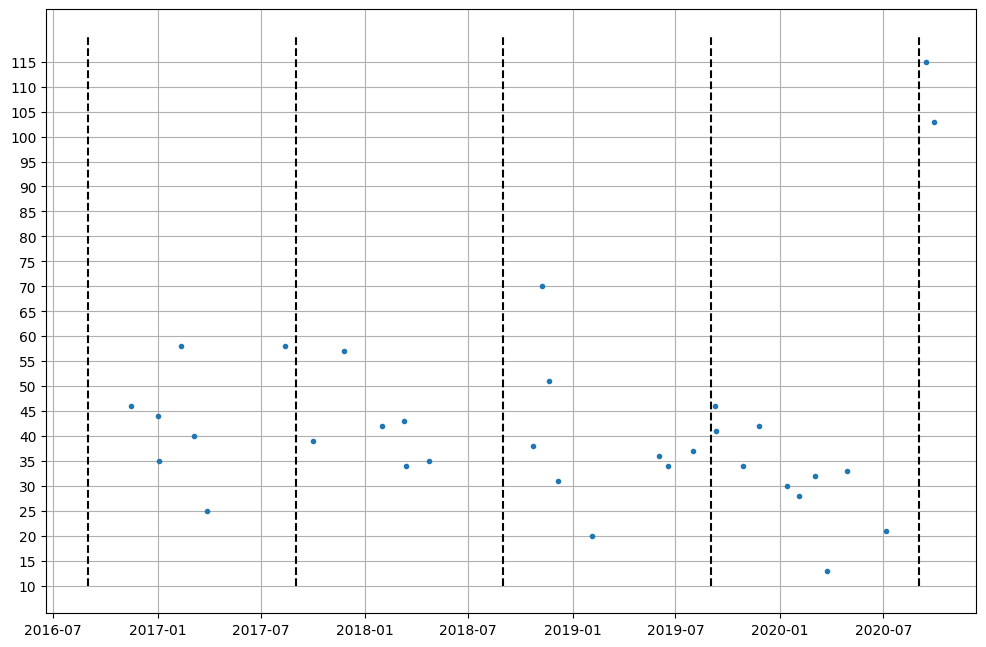

In [700]:
df2 = meeting_attendance(df)
plot_attendance(df2)

In [707]:
df3 = meeting_counts(df)
df3

,Fulde navn,Studienummer,Antal møder,Top
0,Rasmus Ørtoft Aagaard,s164419,29,0.31%
1,Viktor Stenby Johansson,s174483,25,0.31%
2,Josephine Kyvsgaard Budolfsen,s164418,24,0.31%
3,Matteo Christian Vogt,s174474,23,0.31%
4,Clara Chini Nielsen,s164213,23,0.31%
5,Toke Bøgelund-Andersen,s164202,21,0.32%
6,Daniel Jakob Hildebrand,s154410,20,0.32%
7,Nicolai Søborg,s134832,19,0.32%
8,Peter Riis Christiansen,s184221,18,0.64%
9,Niels Kjær Erbsøll,s183903,18,0.64%
